# Question 3

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[[-3.74203958 -3.04465737]
 [ 4.60871196  7.01765941]
 [ 5.31135551  0.97011991]
 ...
 [ 5.17666258  5.10746383]
 [ 6.66563706  5.465137  ]
 [ 7.86690019  4.4964122 ]]
[0 3 2 3 0 3 3 1 3 0 3 3 1 2 1 3 0 0 3 2 3 1 1 2 1 1 1 1 2 2 3 0 0 3 2 2 3
 0 2 1 3 2 0 1 2 0 2 0 0 1 0 1 2 2 2 3 3 3 0 1 2 3 1 1 0 2 0 0 3 1 3 0 0 0
 0 0 0 2 0 1 0 1 1 1 0 3 3 0 2 0 0 2 3 3 2 1 0 2 0 2]
(14000, 2) (6000, 2)
0.49666666666666665
0.966
0.966
0.9658333333333333
0.9651666666666666
0.9648333333333333
0.9635
0.9623333333333334
0.9605
0.9598333333333333
0.9608333333333333
0.9586666666666667
0.9571666666666667
0.9575
0.9558333333333333
(15,) (15,)


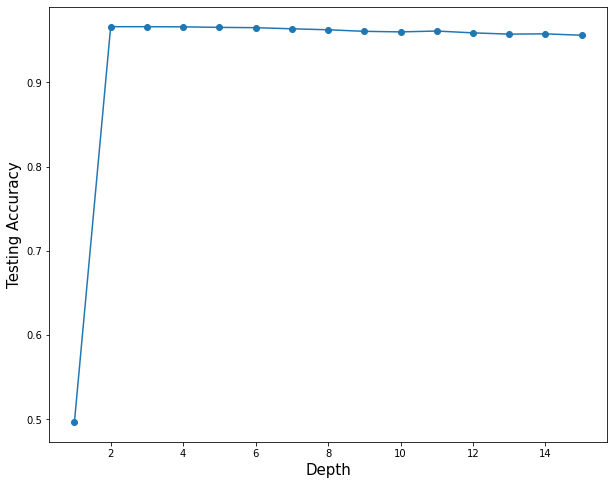

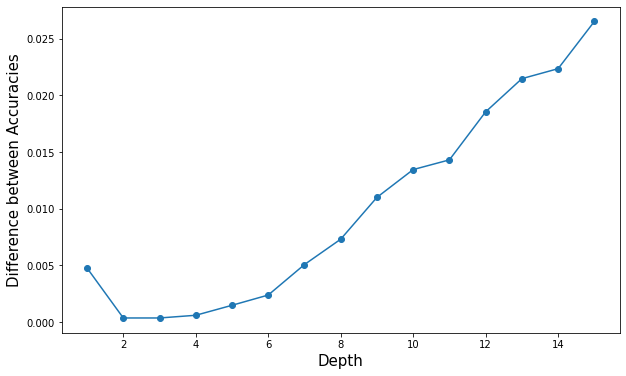

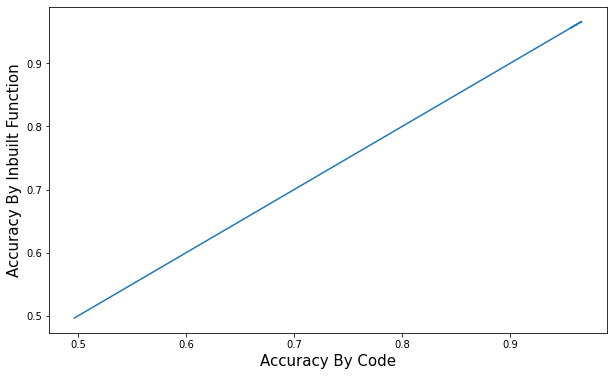

In [ ]:
import ml_assignment1_q2 as q2

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/PRSA_data_2010.1.1-2014.12.31.csv')
dataset = dataset.sample(frac = 1)

X = dataset.iloc[:,3:].values
X1 = dataset.iloc[:,1].values
X = np.concatenate((X1.reshape(len(X),1),X),1)
y = dataset.iloc[:, 2].values
print(X.shape,y.shape)

def handling_data(X):
  sum3 = 0
  minus3 = 0
  for i in range(0,y.size):
    if (not math.isnan(X[i][3])):
      sum3 += X[i][3]
    else:
      minus3 += 1
  mean3 = sum3/(y.size - minus3)
  print(mean3)

  for i in range(0,y.size):
    if (math.isnan(X[i][3])):
      X[i][3] = mean3

  for i in range(0,y.size):
    if (X[i][7] == 'NE'):
      X[i][7] = 0
    elif (X[i][7] == 'NW'):
      X[i][7] = 1
    elif (X[i][7] == 'cv'):
      X[i][7] = 2
    elif (X[i][7] == 'SE'):
      X[i][7] = 3
  
  return X

X = handling_data(X)

print(X)

X_train,X_test,y_train,y_test = q2.splitting(X,y,0.2)
print(X_train.shape,X_test.shape)

(43824, 11) (43824,)
98.61321455085375
[[2012 1 8 ... 1.79 0 0]
 [2011 4 9 ... 3.57 0 0]
 [2012 27 16 ... 9.39 0 0]
 ...
 [2011 22 8 ... 7.15 0 0]
 [2013 12 20 ... 66.17 0 0]
 [2011 28 10 ... 0.89 0 0]]
(35059, 11) (8765, 11)


# Question 3.a)

In [ ]:
def train_criteria(X_train,X_test,y_train,y_test, crtr):
  clf = DTC(criterion = crtr)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accu = q2.checking_accuracy(y_test, y_pred)
  print(accu)

In [ ]:
print('Gini:')
train_criteria(X_train,X_test,y_train,y_test,'gini')
print('Entropy:')
train_criteria(X_train,X_test,y_train,y_test,'entropy')

Gini:
0.8360524814603537
Entropy:
0.8406160867084997


# Question 3.b)

In [ ]:
def train_on_depth(X_train,X_test,y_train,y_test):
  i=2
  k=0
  test_ac = [0]*6
  train_ac = [0]*6
  depth = [2,4,8,10,15,30]
  # print(test_ac)
  for i in depth:
    # print(i,k)
    clf = DTC(criterion = 'entropy', max_depth=i)
    # print(i)
    clf.fit(X_train,y_train)

    y_pred = clf.predict(X_test)
    
    test_ac[k] = q2.checking_accuracy(y_test,y_pred)
    
    y_pred = clf.predict(X_train)
    
    train_ac[k] = q2.checking_accuracy(y_train,y_pred)

    k+=1

  return depth, train_ac, test_ac;

depth, train_ac, test_ac = train_on_depth(X_train,X_test,y_train,y_test)
# print(train_ac)

# print(test_ac)

In [ ]:
dic = {'Depth':depth,'Training Data Accuracy':train_ac,'Testing Data Accuracy':test_ac}
df = pd.DataFrame(data=dic)
df

,Depth,Training Data Accuracy,Testing Data Accuracy
0,2,0.275992,0.274729
1,4,0.399612,0.391101
2,8,0.582932,0.550485
3,10,0.706067,0.650086
4,15,0.945093,0.811523
5,30,1.000000,0.838448


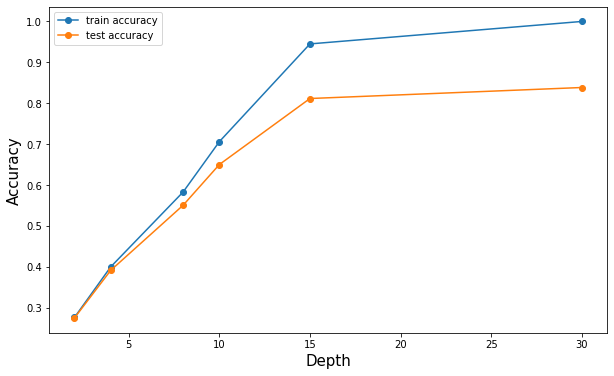

In [ ]:
def plotting_3b(depth,train_ac,test_ac):
  train_ac = np.array(train_ac)
  test_ac = np.array(test_ac)
  depth = np.array(depth)

  # diff = train_ac-test_ac
  # print(diff)
  plt.figure(figsize=[10,6])
  plt.xlabel('Depth',fontsize=15)
  plt.ylabel('Accuracy',fontsize=15)
  plt.plot(depth,train_ac,label='train accuracy',marker='o')
  plt.plot(depth,test_ac,label='test accuracy',marker='o')
  plt.legend()
  plt.show()

plotting_3b(depth,train_ac,test_ac)


# Question 3.c)

In [ ]:
def stumps(X, y, depth, trees, predict_on):
  # acc = 0
  y_pred = np.zeros((trees,predict_on.shape[0]))
  # j=1
  for i in range(0,trees):
    dicn = {'year':X_train[:,0],'day':X_train[:,1],'hour':X_train[:,2],
            'pm2.5':X_train[:,3],'DEWP':X_train[:,4],'Temp':X_train[:,5],
            'PRES':X_train[:,6],'cbwd':X_train[:,7],'lws':X_train[:,8],
            'ls':X_train[:,9],'lr':X_train[:,10],'month':y_train}
    df = pd.DataFrame(data=dicn)
    df = df.sample(frac = 1) #Shuffling Data
    X1 = df.iloc[:, :-1].values
    y1 = df.iloc[:, -1].values
    X1_train,X1_test,y1_train,y1_test = q2.splitting(X1,y1,0.5)
    # print(X_train, np.unique(y_train))
    clf = DTC(criterion='entropy', max_depth=depth)
    
    clf.fit(X1_train,y1_train)
    
    y1_pred = clf.predict(predict_on)

    y_pred[i] = y1_pred
    
  return y_pred

In [ ]:
voted = stumps(X, y, 3,100,X_test)
# print(voted.shape)
# print(voted.shape[0])

In [ ]:
def getting_predicted_value(voted):
  y_pred = [0]*voted[0].size
  for i in range(0,voted[0].size):
    lis = [0]*13
    for j in range(0,voted.shape[0]):
      lis[int (voted[j][i])]+=1
    max=0
    indx = 0
    for k in range(1,13):
      if(max<lis[k]):
        max = lis[k]
        indx = k
    y_pred[i] = indx
  y_pred = np.array(y_pred)
  return y_pred

In [ ]:
y_pred = getting_predicted_value(voted)
# print(y_pred.shape)
print(q2.checking_accuracy(y_test,y_pred))

0.34135767256132343


# Question 3.d)

In [ ]:
def training_depths(X,y,depth,trees,predict_on,check_with):
  for i in depth:
    for j in trees:
      vote = stumps(X,y,i,j,predict_on)
      y_pred = getting_predicted_value(vote)
      # print(y_pred.shape)
      print("Depth:{0:d}".format(i),"\tNo. of Trees:{0:d}".format(j),"\tAccuracy:{0:.2f}".format(q2.checking_accuracy(check_with,y_pred)*100))

In [ ]:
depth=[4, 8, 10, 15, 20, 30]
trees=[10, 25, 50]
training_depths(X,y,depth,trees,X_test,y_test)

Depth:4 	No. of Trees:10 	Accuracy:39.90
Depth:4 	No. of Trees:25 	Accuracy:39.40
Depth:4 	No. of Trees:50 	Accuracy:39.26
Depth:8 	No. of Trees:10 	Accuracy:58.01
Depth:8 	No. of Trees:25 	Accuracy:59.98
Depth:8 	No. of Trees:50 	Accuracy:59.41
Depth:10 	No. of Trees:10 	Accuracy:71.71
Depth:10 	No. of Trees:25 	Accuracy:74.36
Depth:10 	No. of Trees:50 	Accuracy:74.41
Depth:15 	No. of Trees:10 	Accuracy:87.14
Depth:15 	No. of Trees:25 	Accuracy:89.66
Depth:15 	No. of Trees:50 	Accuracy:90.45
Depth:20 	No. of Trees:10 	Accuracy:88.43
Depth:20 	No. of Trees:25 	Accuracy:90.77
Depth:20 	No. of Trees:50 	Accuracy:91.63
Depth:30 	No. of Trees:10 	Accuracy:88.28
Depth:30 	No. of Trees:25 	Accuracy:91.18
Depth:30 	No. of Trees:50 	Accuracy:91.56


In [ ]:
def training_on_trees(X,y,depth,trees,predict_on,check_with):
  for i in trees:
    vote = stumps(X,y,depth,i,predict_on)
    y_pred = getting_predicted_value(vote)
    # print(y_pred.shape)
    print("Depth:{0:d}".format(depth),"\tNo. of Trees:{0:d}".format(i),"\tAccuracy:{0:.2f}".format(q2.checking_accuracy(check_with,y_pred)*100))

In [ ]:
trees = [10, 20, 40, 75, 100]
training_on_trees(X,y,30,trees,X_train,y_train)

Depth:30 	No. of Trees:10 	Accuracy:98.92
Depth:30 	No. of Trees:20 	Accuracy:99.62
Depth:30 	No. of Trees:40 	Accuracy:99.87
Depth:30 	No. of Trees:75 	Accuracy:99.93
Depth:30 	No. of Trees:100 	Accuracy:99.97


In [ ]:
training_on_trees(X,y,30,trees,X_test,y_test)

Depth:30 	No. of Trees:10 	Accuracy:88.57
Depth:30 	No. of Trees:20 	Accuracy:90.56
Depth:30 	No. of Trees:40 	Accuracy:91.73
Depth:30 	No. of Trees:75 	Accuracy:91.80
Depth:30 	No. of Trees:100 	Accuracy:91.87


In [ ]:
training_on_trees(X,y,20,trees,X_train,y_train)

Depth:20 	No. of Trees:10 	Accuracy:98.84
Depth:20 	No. of Trees:20 	Accuracy:99.61
Depth:20 	No. of Trees:40 	Accuracy:99.86
Depth:20 	No. of Trees:75 	Accuracy:99.95
Depth:20 	No. of Trees:100 	Accuracy:99.95


In [ ]:
training_on_trees(X,y,20,trees,X_test,y_test)

Depth:20 	No. of Trees:10 	Accuracy:88.16
Depth:20 	No. of Trees:20 	Accuracy:90.61
Depth:20 	No. of Trees:40 	Accuracy:91.68
Depth:20 	No. of Trees:75 	Accuracy:91.95
Depth:20 	No. of Trees:100 	Accuracy:91.98


In [ ]:
trees = [120, 150, 200, 300]
training_on_trees(X,y,30,trees,X_train,y_train)

Depth:30 	No. of Trees:120 	Accuracy:99.96
Depth:30 	No. of Trees:150 	Accuracy:99.96
Depth:30 	No. of Trees:200 	Accuracy:99.97
Depth:30 	No. of Trees:300 	Accuracy:99.99


In [ ]:
training_on_trees(X,y,30,trees,X_test,y_test)

Depth:30 	No. of Trees:120 	Accuracy:92.10
Depth:30 	No. of Trees:150 	Accuracy:92.08
Depth:30 	No. of Trees:200 	Accuracy:92.18
Depth:30 	No. of Trees:300 	Accuracy:92.44
